In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
experiments = []
percorso = "../models/exports/batch_n_controllori/batch_8_controllori/ticket_trend_"
for i in range(10):
    experiments.append(pd.read_csv(percorso+str(i)+"_8.csv",header = False, names = ['Time','1','2','3','4','Abbonati','Utility','Total_risk']))
    experiments[i]['incremento']=zeros(len(experiments[i]['Time']))
    shifted = [list(experiments[i]['Utility'])[0]] + list(experiments[i]['Utility'])[:-1]
    experiments[i]['incremento'] = array(list(experiments[i]['Utility']))- array(shifted)

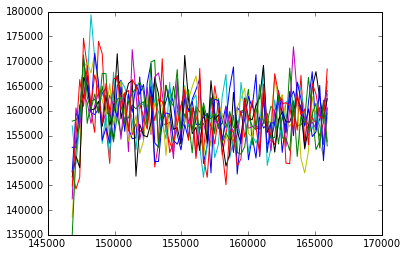

In [3]:
for expo in experiments:
        plot(expo['Time'][1:],expo['incremento'][1:])

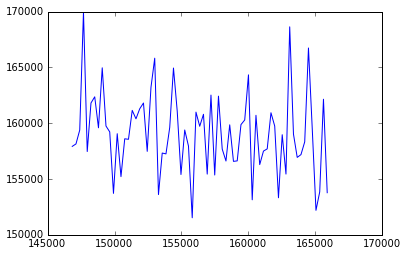

In [4]:
plot(experiments[1]['Time'][1:],experiments[1]['incremento'][1:])

In [5]:
time_utility = [[] for i in experiments[1]['Time'][1:]]#contiene tutti e 520 i tempi, e per ognuno, il rischio in ogni esperimento
for j in range(len(time_utility)):
    for expo in experiments:
        time_utility[j].append(expo['incremento'][j+1])
print shape(time_utility)

(69, 10)


In [6]:
medie = [[] for i in experiments[1]['Time'][1:]]
stds = [[] for i in experiments[1]['Time'][1:]]
for i in range(len(time_utility)):
    medie[i].append(mean(time_utility[i]))
    stds[i].append(std(time_utility[i]))

In [7]:
from scipy.optimize import curve_fit
def carica_cond (t,A,tao):
    return A*(1-exp(-(t-146841)/tao))
print list(experiments[1]['Time'])[1]

146841.0


In [8]:
import sklearn.metrics
def optimization_step(taos,As,AA,Tao):
    errors_tao = []
    for tao in taos:
        errors_tao.append(sklearn.metrics.mean_squared_error(medie,carica_cond(array(list(experiments[1]['Time'])[1:]),AA,tao)))
    tao = taos[argmin(errors_tao)]
    errors_A = []
    for A in As:
        errors_A.append(sklearn.metrics.mean_squared_error(medie,carica_cond(array(list(experiments[1]['Time'])[1:]),A,tao)))
    A = As[argmin(errors_A)]
    print A,tao
    return A,tao

In [9]:
taos = linspace (1,150,10000)
As=linspace(150000,170000,10000)
A,tao = 157890.789079, 150.19061906
for i in range(10):
    A,tao = optimization_step(taos,As,A,tao)

159138.913891 79.7096709671
159158.915892 85.6702670267
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676
159158.915892 85.7596759676


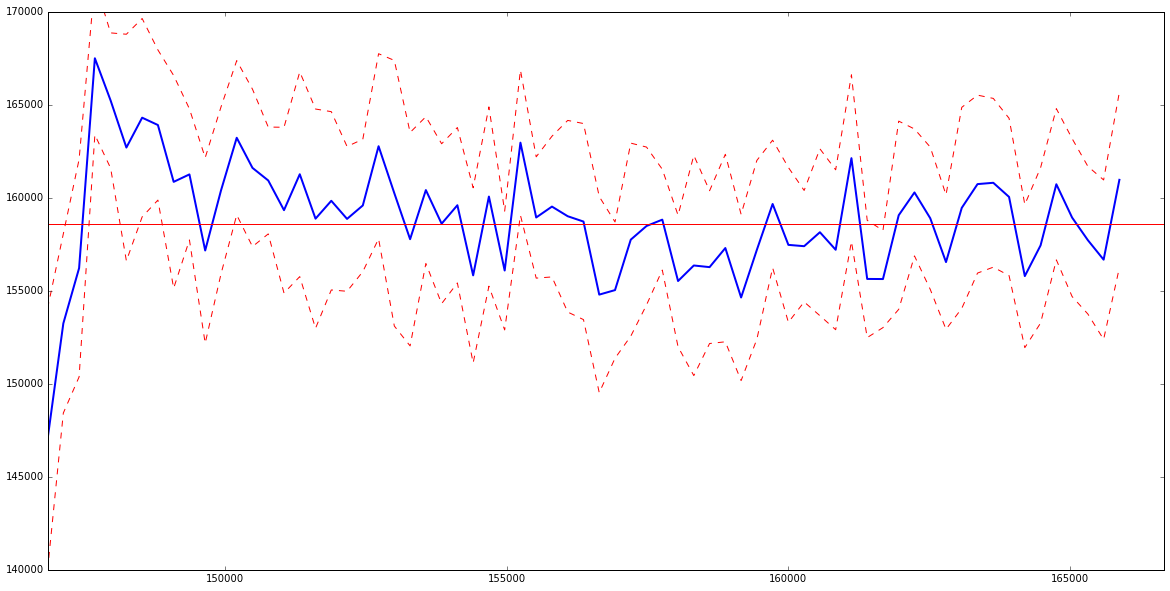

In [10]:
fig = plt.figure(2, figsize=(20,10))
ax = fig.add_subplot(111)
ylim(ymin=140000)
ylim(ymax=170000)
xlim(xmax = 166666)
xlim(xmin = 146841)
graph = ax.plot(experiments[1]['Time'][1:],medie,linewidth=2)
graph2 = ax.plot(experiments[1]['Time'][1:],array(medie)+array(stds),'r--')
graph3 = ax.plot(experiments[1]['Time'][1:],array(medie)-array(stds),'r--')
axhline(y=158582.54,linewidth=1, color='r')
#graph4 = ax.plot(tao*5*ones(100)+146841,linspace(1,180000,100),'g-')
#x = linspace(146000,166000,1000)
#graph5 = ax.plot(x,carica_cond(x,A,tao))

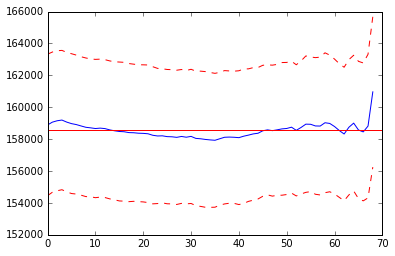

In [11]:
time = list(experiments[1]['Time'][1:])
ipotesi = linspace(min(ravel(medie)), max(ravel(medie)),100)
coeff = []
stds2 = []
for i in range(len(medie)):
    coeff.append(mean(medie[i:]))
    stds2.append(mean(stds[i:]))
plot(coeff)
plot(array(coeff)+ array(stds2),'r--')
plot(array(coeff)- array(stds2),'r--')
axhline(y=158582.54,linewidth=1, color='r')

In [12]:
print stds2[argmin(stds2)], time[argmin(stds2)], coeff[argmin(stds2)]

4077.87796142 159721.0 158582.545652


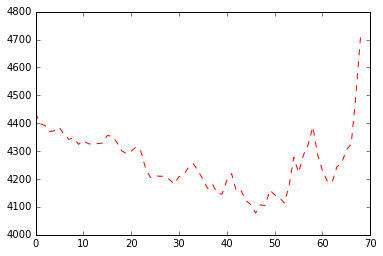

In [13]:
plot(array(stds2),'r--')